#**Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

#**Importing dataset**

This dataset is a reprocessed version of the Loan_Default dataset from Kaggle. It has been modified to make it useful for predicting the loss given default by simulating some key variables such as the time to recovery and the recovery rate.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/RM_lectures/data/Data generation/data.csv', index_col='ID')


In [4]:
df

,year,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,EAD,rate_of_interest,...,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,dtir1,TTR,RR,LGD
ID,,,,,,,,,,,,,,,,,,,,,
24890,2019,NaN,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,758,CIB,25-34,98.728814,south,direct,45.0,31.0,0.48,0.52
24892,2019,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,834,CIB,35-44,80.019685,south,direct,46.0,24.0,0.28,0.72
24893,2019,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,587,CIB,45-54,69.376900,North,direct,42.0,37.0,0.55,0.45
24894,2019,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,602,EXP,25-34,91.886544,North,direct,39.0,46.0,0.77,0.23
24895,2019,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.990,...,864,EXP,35-44,70.089286,North,direct,40.0,23.0,0.24,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173555,2019,NaN,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,659,EXP,55-64,71.792763,south,direct,48.0,29.0,0.31,0.69
173556,2019,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,569,CIB,25-34,74.428934,south,direct,15.0,37.0,0.48,0.52
173557,2019,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,702,EXP,45-54,61.332418,North,direct,49.0,29.0,0.40,0.60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133555 entries, 24890 to 173559
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year                      133555 non-null  int64  
 1   Gender                    100091 non-null  object 
 2   approv_in_adv             132744 non-null  object 
 3   loan_type                 133555 non-null  object 
 4   loan_purpose              133438 non-null  object 
 5   Credit_Worthiness         133555 non-null  object 
 6   open_credit               133555 non-null  object 
 7   business_or_commercial    133555 non-null  object 
 8   EAD                       133555 non-null  int64  
 9   rate_of_interest          112223 non-null  float64
 10  Upfront_charges           109022 non-null  float64
 11  Neg_ammortization         133442 non-null  object 
 12  interest_only             133555 non-null  object 
 13  lump_sum_payment          133555 non-null  ob

#**Cleaning data**

##**Drop Columns**

As the first manipulation of the dataset, I deemed it appropriate to remove the variables: year, open_credit, secured_by, total_units, Security_Type because they were extremely unbalanced. I also removed the variables: property_value, income, and RR because they were redundant. Specifically, the information contained in property_value is expressed as a percentage of the exposure in the LTV variable, just as income is in the dtir1 variable, and RR in LGD.
These data manipulations are aimed at streamlining the dataset, focusing on variables that offer unique and significant insights for predicting loss given default, and improving the efficiency and accuracy of any predictive models that will be developed using this data.

In [6]:
cols_to_drop = ['year', 'open_credit', 'property_value', 'Secured_by', 'total_units', 'income', 'Security_Type', 'RR']
df1 = df.drop(cols_to_drop, axis=1).reset_index()

In [7]:
unique_ID = df1.iloc[:, 0].unique()
ID_to_sequential = {ID: i+1 for i, ID in enumerate(unique_ID)}
df1['ID_Sequential'] = df1.iloc[:, 0].map(ID_to_sequential)
df2 = df1.drop('ID', axis=1)
df2.set_index('ID_Sequential')

,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,EAD,rate_of_interest,Upfront_charges,Neg_ammortization,...,occupancy_type,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,dtir1,TTR,LGD
ID_Sequential,,,,,,,,,,,,,,,,,,,,,
1,NaN,nopre,type1,p1,l1,nob/c,116500,NaN,NaN,not_neg,...,pr,EXP,758,CIB,25-34,98.728814,south,45.0,31.0,0.52
2,Male,pre,type1,p1,l1,nob/c,406500,4.560,595.00,neg_amm,...,pr,EXP,834,CIB,35-44,80.019685,south,46.0,24.0,0.72
3,Male,nopre,type1,p4,l1,nob/c,456500,4.250,NaN,not_neg,...,pr,EXP,587,CIB,45-54,69.376900,North,42.0,37.0,0.45
4,Joint,pre,type1,p1,l1,nob/c,696500,4.000,0.00,not_neg,...,pr,CRIF,602,EXP,25-34,91.886544,North,39.0,46.0,0.23
5,Joint,pre,type1,p1,l1,nob/c,706500,3.990,370.00,not_neg,...,pr,EXP,864,EXP,35-44,70.089286,North,40.0,23.0,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133551,NaN,nopre,type1,p3,l1,nob/c,436500,3.125,9960.00,not_neg,...,pr,CIB,659,EXP,55-64,71.792763,south,48.0,29.0,0.69
133552,Male,nopre,type1,p1,l1,nob/c,586500,5.190,0.00,not_neg,...,ir,CIB,569,CIB,25-34,74.428934,south,15.0,37.0,0.52
133553,Male,nopre,type1,p4,l1,nob/c,446500,3.125,1226.64,not_neg,...,pr,CIB,702,EXP,45-54,61.332418,North,49.0,29.0,0.60


##**Remove Nan**

In [8]:
df2 = df1.dropna()
df2

,ID,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,EAD,rate_of_interest,Upfront_charges,...,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,dtir1,TTR,LGD,ID_Sequential
1,24892,Male,pre,type1,p1,l1,nob/c,406500,4.560,595.00,...,EXP,834,CIB,35-44,80.019685,south,46.0,24.0,0.72,2
3,24894,Joint,pre,type1,p1,l1,nob/c,696500,4.000,0.00,...,CRIF,602,EXP,25-34,91.886544,North,39.0,46.0,0.23,4
4,24895,Joint,pre,type1,p1,l1,nob/c,706500,3.990,370.00,...,EXP,864,EXP,35-44,70.089286,North,40.0,23.0,0.76,5
5,24896,Joint,pre,type1,p3,l1,nob/c,346500,4.500,5120.00,...,EXP,860,EXP,55-64,79.109589,North,44.0,22.0,0.75,6
6,24897,Female,nopre,type1,p4,l1,nob/c,266500,4.125,5609.88,...,CIB,863,CIB,55-64,86.525974,North,42.0,31.0,0.42,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133549,173554,Joint,nopre,type2,p1,l1,b/c,156500,3.990,3113.06,...,EXP,859,EXP,65-74,99.050633,central,45.0,28.0,0.54,133550
133551,173556,Male,nopre,type1,p1,l1,nob/c,586500,5.190,0.00,...,CIB,569,CIB,25-34,74.428934,south,15.0,37.0,0.52,133552
133552,173557,Male,nopre,type1,p4,l1,nob/c,446500,3.125,1226.64,...,CIB,702,EXP,45-54,61.332418,North,49.0,29.0,0.60,133553
133553,173558,Female,nopre,type1,p4,l1,nob/c,196500,3.500,4323.33,...,EXP,737,EXP,55-64,70.683453,North,29.0,28.0,0.59,133554


##**Ouliers Detection**

Removing outliers from a dataset is essential for enhancing the model's ability to generalize effectively and reducing its sensitivity to extreme values. By identifying and excluding these anomalies, we can prevent them from skewing the results and ensure a more robust and reliable model performance. This process is crucial in achieving accurate predictions and maintaining the integrity of the data analysis.

In [9]:
df2 = df2.reset_index()

In [10]:
def find_outliers_multi_columns(df, column_names, m=5):
    outliers = {}
    for column_name in column_names:
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        lower_bound = mean - m * std
        upper_bound = mean + m * std

        outlier_indices = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound))[0]
        if len(outlier_indices) > 0:
            outliers[column_name] = outlier_indices

    return outliers

# Find ouliers
columns_to_check = ['EAD', 'rate_of_interest', 'Upfront_charges', 'Credit_Score', 'LTV', 'dtir1', 'TTR']
outliers = find_outliers_multi_columns(df2, columns_to_check, m=5)

all_outlier_indices = set()
for indices in outliers.values():
    all_outlier_indices.update(indices)

# Convert set in list for dropping
all_outlier_indices_list = list(all_outlier_indices)

# Remove raws with outliers
df_clean = df2.drop(index=all_outlier_indices_list)

# Check the result
print(f'Number of raws before removing ouliers: {df2.shape[0]}')
print(f'Number of raws after removing outliers: {df_clean.shape[0]}')

Number of raws before removing ouliers: 76898
Number of raws after removing outliers: 76623


In [11]:
df2 = df2.set_index('ID')

#**Features Engineering**

##**Categorical Variables**

###**Binary encoding**

Binary encode approv_in_adv, Credit_Worthiness, business_or_commercial, Neg_ammortization, interest_only, lump_sum_payment, co-applicant_credit_type

In [12]:
df2['approv_in_adv'] = df2['approv_in_adv'].replace('pre', 1)
df2['approv_in_adv'] = df2['approv_in_adv'].replace('nopre', 0)

In [13]:
df2['Credit_Worthiness'] = df2['Credit_Worthiness'].replace('l1', 0)
df2['Credit_Worthiness'] = df2['Credit_Worthiness'].replace('l2', 0)

In [14]:
df2['business_or_commercial'] = df2['business_or_commercial'].replace('nob/c', 0)
df2['business_or_commercial'] = df2['business_or_commercial'].replace('b/c', 1)

In [15]:
df2['Neg_ammortization'] = df2['Neg_ammortization'].replace('not_neg', 0)
df2['Neg_ammortization'] = df2['Neg_ammortization'].replace('neg_amm', 1)

In [16]:
df2['interest_only'] = df2['interest_only'].replace('not_int', 0)
df2['interest_only'] = df2['interest_only'].replace('int_only', 1)

In [17]:
df2['lump_sum_payment'] = df2['lump_sum_payment'].replace('not_lpsm', 0)
df2['lump_sum_payment'] = df2['lump_sum_payment'].replace('lpsm', 1)

In [18]:
df2['co-applicant_credit_type'] = df2['co-applicant_credit_type'].replace('CIB', 0)
df2['co-applicant_credit_type'] = df2['co-applicant_credit_type'].replace('EXP', 1)

###**One-Hot-Encoding**

Applying One-Hot-Encoding tecnique for: loan_limit, Gender, loan_type, loan_purpose, occupancy_type, credit_type, Region

In [19]:
OHE_cols = ['Gender', 'loan_type', 'loan_purpose', 'occupancy_type', 'credit_type', 'age', 'Region']
df2 = pd.get_dummies(df2, columns=OHE_cols)

##**Numerical Variables**

###**Looking at the distribution of numerical columns to standardize**

In [20]:
numerical_cols = ['EAD', 'rate_of_interest', 'Upfront_charges', 'Credit_Score', 'LTV', 'dtir1', 'TTR']

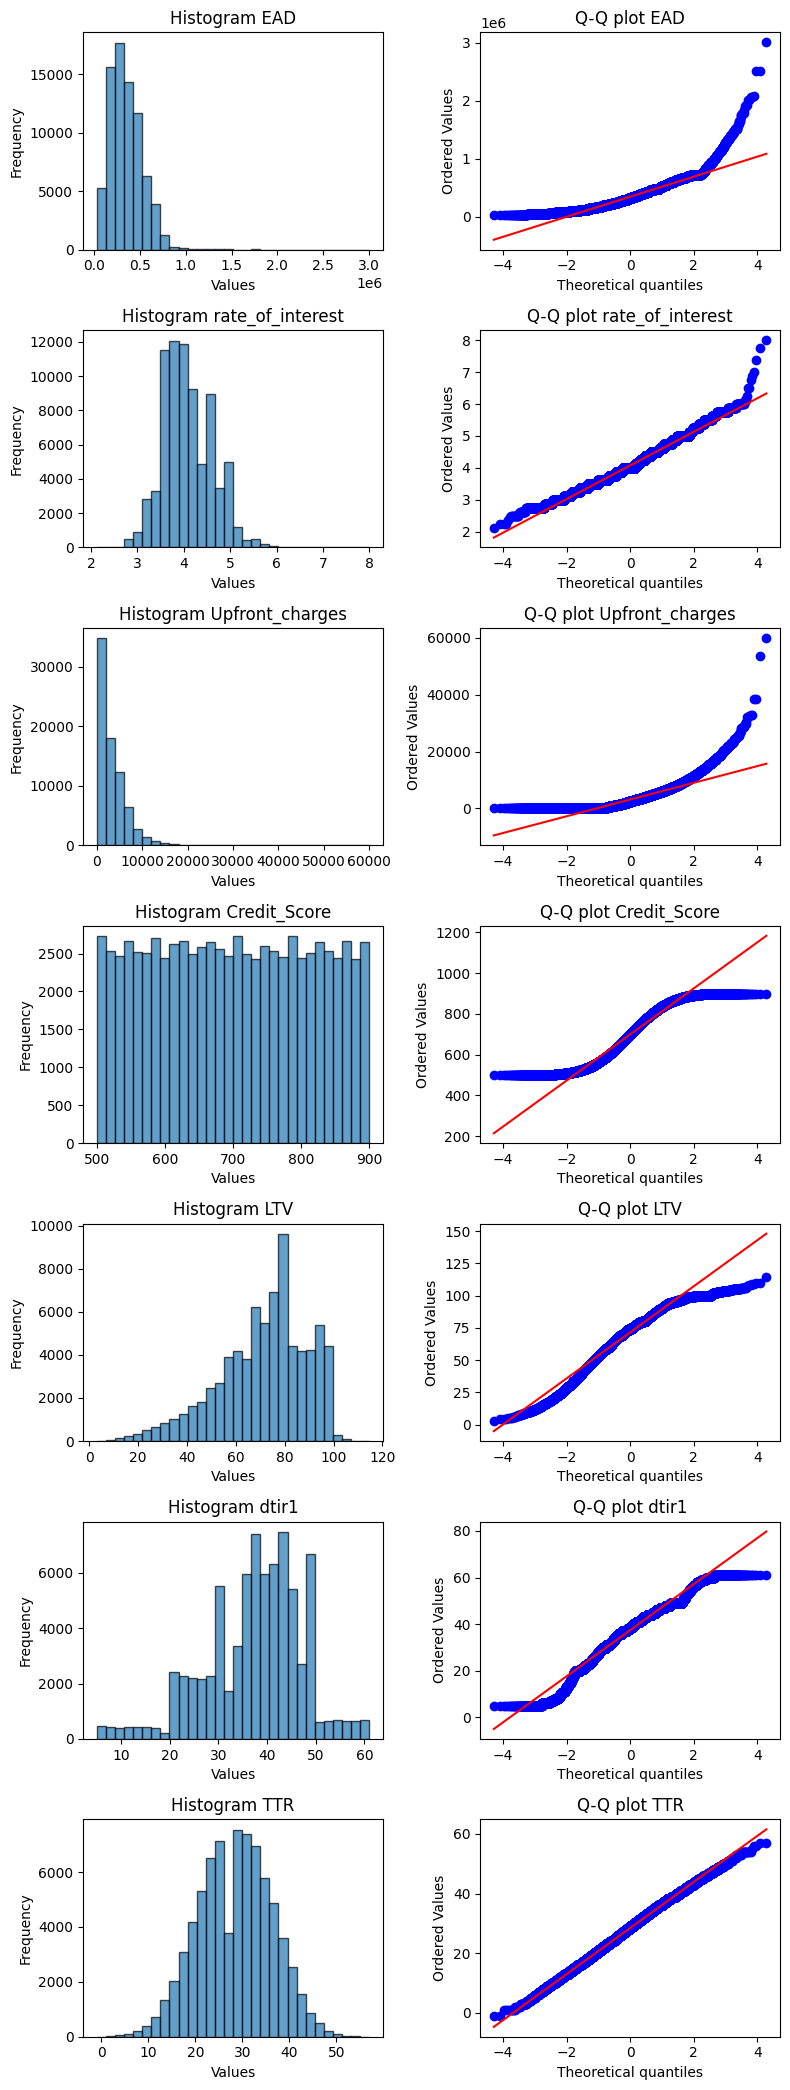

In [21]:
fig, axs = plt.subplots(len(numerical_cols), 2, figsize=(8, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols):
    data = df2[col]

    # Histogram
    axs[i, 0].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axs[i, 0].set_title(f'Histogram {col}')
    axs[i, 0].set_xlabel('Values')
    axs[i, 0].set_ylabel('Frequency')

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

###**Standardize numerical columns**

Standardizing numerical variables is crucial when using machine learning models that are sensitive to dimensionality, such as Support Vector Machines. However, this step may be unnecessary for models like decision trees or random forests, which are less affected by the scale of input variables. Therefore, it is always advisable to prepare different versions of your dataset to ensure that you can select the most suitable one for the specific model you intend to use. This approach helps optimize model performance and accuracy across different algorithms.








In [22]:
scaler = StandardScaler()

In [23]:
X_scaled = df2.drop('LGD', axis=1)

In [24]:
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

In [25]:
X_scal_t = X_scaled.transpose()
X_scal_t

ID,24892,24894,24895,24896,24897,24898,24904,24908,24910,24911,...,173544,173545,173547,173550,173552,173554,173556,173557,173558,173559
index,1,3,4,5,6,7,13,17,19,20,...,133541,133542,133544,133546,133548,133549,133551,133552,133553,133554
approv_in_adv,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Credit_Worthiness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business_or_commercial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
EAD,0.338102,1.970445,2.026733,0.000376,-0.449926,0.169239,-0.675077,0.338102,-0.224775,-1.181666,...,-1.181666,-0.731365,-0.1122,0.112951,1.689007,-1.069091,1.351281,0.563253,-0.84394,0.338102
rate_of_interest,0.912315,-0.145687,-0.164579,0.798958,0.090475,1.507441,0.798958,0.912315,-2.053869,-0.164579,...,-0.164579,3.613999,0.326636,-0.381848,-0.85417,-0.164579,2.102567,-1.798814,-1.090331,0.562797
Upfront_charges,-0.789005,-0.975216,-0.859421,0.627143,0.780456,-0.615311,0.261958,-0.695116,2.301483,0.325527,...,0.415622,-0.975216,-0.843303,0.16495,1.415741,-0.000951,-0.975216,-0.591326,0.377816,0.902548
Neg_ammortization,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
interest_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
lump_sum_payment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Define target variable**

In [26]:
X = df2.drop('LGD', axis=1)

In [27]:
y = df2['LGD']

#**Features Selection**

##**Pearson Correlation selection**

In [28]:
corr = X_scaled.corr().abs()
corr

,index,approv_in_adv,Credit_Worthiness,business_or_commercial,EAD,rate_of_interest,Upfront_charges,Neg_ammortization,interest_only,lump_sum_payment,...,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North,Region_North-East,Region_central,Region_south
index,1.000000,0.001020,NaN,0.005222,0.000045,0.000378,0.006395,0.007063,0.005658,0.003129,...,0.002048,0.005589,0.005392,0.005035,0.001111,0.002057,0.000978,0.001710,0.000984,0.000868
approv_in_adv,0.001020,1.000000,NaN,0.025989,0.053594,0.061848,0.018720,0.037116,0.072225,0.026902,...,0.002725,0.013210,0.009846,0.004000,0.019805,0.010038,0.025823,0.004724,0.000294,0.029421
Credit_Worthiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_or_commercial,0.005222,0.025989,NaN,1.000000,0.171984,0.036731,0.086544,0.006228,0.004411,0.002224,...,0.019263,0.008942,0.019198,0.029329,0.036487,0.033665,0.017334,0.011969,0.054376,0.054202
EAD,0.000045,0.053594,NaN,0.171984,1.000000,0.132819,0.039652,0.029290,0.021883,0.004068,...,0.143537,0.059392,0.088215,0.153470,0.045819,0.094916,0.117225,0.022911,0.031573,0.151998
rate_of_interest,0.000378,0.061848,NaN,0.036731,0.132819,1.000000,0.102895,0.173646,0.075574,0.015976,...,0.031932,0.002635,0.026163,0.019749,0.018992,0.009299,0.021062,0.008069,0.024626,0.039563
Upfront_charges,0.006395,0.018720,NaN,0.086544,0.039652,0.102895,1.000000,0.024188,0.006186,0.007823,...,0.048264,0.021587,0.060434,0.046950,0.032156,0.034397,0.021206,0.025296,0.042219,0.054193
Neg_ammortization,0.007063,0.037116,NaN,0.006228,0.029290,0.173646,0.024188,1.000000,0.043025,0.024296,...,0.010579,0.004113,0.008845,0.000054,0.001333,0.007381,0.004358,0.002090,0.009116,0.009734
interest_only,0.005658,0.072225,NaN,0.004411,0.021883,0.075574,0.006186,0.043025,1.000000,0.017476,...,0.007906,0.000802,0.010929,0.008682,0.005324,0.002454,0.005685,0.002185,0.002493,0.008193
lump_sum_payment,0.003129,0.026902,NaN,0.002224,0.004068,0.015976,0.007823,0.024296,0.017476,1.000000,...,0.002338,0.002360,0.004591,0.006206,0.000234,0.002127,0.008615,0.005097,0.001232,0.009824


In [29]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [30]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [31]:
X_corr = X_scaled.drop(columns=to_drop)

In [32]:
print("Dropped columns:", to_drop)

Dropped columns: ['ID_Sequential', 'Gender_Joint', 'loan_type_type2']


##**Lasso regression selection**

In [33]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_corr, y)

Lasso(alpha=1e-05)

In [34]:
Lasso_selection = [feature for feature, coef in zip(X_corr.columns, lasso.coef_) if coef != 0]

In [35]:
print("Lasso Regression selected the following features:")
print(Lasso_selection)

Lasso Regression selected the following features:
['index', 'business_or_commercial', 'EAD', 'rate_of_interest', 'Upfront_charges', 'Credit_Score', 'co-applicant_credit_type', 'LTV', 'dtir1', 'TTR', 'loan_type_type1', 'credit_type_CRIF', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'Region_central', 'Region_south']


In [36]:
len(Lasso_selection)

18

#**Reduced features dataset**

In [37]:
X_reduced = df2[Lasso_selection]

In [38]:
X_reduced_scaled = X_scaled[Lasso_selection]

#**Save Datasets**

In [39]:
df2.to_csv('data_cleaned', index=True)
X_scaled.to_csv('X_scaled', index=True)
X_reduced.to_csv('X_reduced', index=True)
X_reduced_scaled.to_csv('X_reduced_scaled', index=True)